## 데이터 준비

In [369]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline


In [370]:
# 데이터 준비
def dataReady(x):
    boxOffice = pd.read_excel('data/' + x)
    boxOffice.columns = ['순위', '영화명', '개봉일', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '대표국적', '국적', '배급사']
    boxOffice = boxOffice.drop([0, 1]) 
    boxOffice = boxOffice.reset_index()
    del boxOffice["index"]
    return boxOffice


In [371]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    plt.rcParams['axes.unicode_minus'] = False
elif platform.system() == 'Windows':
    path = "c:\Windows\Fonts\malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Linux':
    rc('font', family='NanumBarunGothic')
else:
    print("Error...")

In [372]:
boxOffice2018X = "연도별박스오피스_2018년.xlsx"
boxOffice2017X = "연도별박스오피스_2017년.xlsx"
boxOffice2016X = "연도별박스오피스_2016년.xlsx"
boxOffice2015X = "연도별박스오피스_2015년.xlsx"
boxOffice2014X = "연도별박스오피스_2014년.xlsx"
boxOffice2013X = "연도별박스오피스_2013년.xlsx"
boxOffice2012X = "연도별박스오피스_2012년.xlsx"
boxOffice2011X = "연도별박스오피스_2011년.xlsx"
boxOffice2010X = "연도별박스오피스_2010년.xlsx"
boxOffice2009X = "연도별박스오피스_2009년.xlsx"
boxOffice2008X = "연도별박스오피스_2008년.xlsx"
boxOffice2007X = "연도별박스오피스_2007년.xlsx"
boxOffice2006X = "연도별박스오피스_2006년.xlsx"
boxOffice2005X = "연도별박스오피스_2005년.xlsx"
boxOffice2004X = "연도별박스오피스_2004년.xlsx"

boxOffice2018 = dataReady(boxOffice2018X)
boxOffice2017 = dataReady(boxOffice2017X)
boxOffice2016 = dataReady(boxOffice2016X)
boxOffice2015 = dataReady(boxOffice2015X)
boxOffice2014 = dataReady(boxOffice2014X)
boxOffice2013 = dataReady(boxOffice2013X)
boxOffice2012 = dataReady(boxOffice2012X)
boxOffice2011 = dataReady(boxOffice2011X)
boxOffice2010 = dataReady(boxOffice2010X)
boxOffice2009 = dataReady(boxOffice2009X)
boxOffice2008 = dataReady(boxOffice2008X)
boxOffice2007 = dataReady(boxOffice2007X)
boxOffice2006 = dataReady(boxOffice2006X)
boxOffice2005 = dataReady(boxOffice2005X)
boxOffice2004 = dataReady(boxOffice2004X)


In [373]:
boxOffice2018.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,신과함께-인과 연,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
1,2,어벤져스: 인피니티 워,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,3,미션 임파서블: 폴아웃,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
3,4,신과함께-죄와 벌,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,5,쥬라기 월드: 폴른 킹덤,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)


In [374]:
type(boxOffice2018)

pandas.core.frame.DataFrame

In [375]:
boxOffice2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4510 entries, 0 to 4509
Data columns (total 11 columns):
순위         4510 non-null object
영화명        4509 non-null object
개봉일        2828 non-null object
매출액        4510 non-null object
매출액 점유율    4509 non-null object
관객수        4510 non-null object
스크린수       4510 non-null object
상영횟수       4510 non-null object
대표국적       4434 non-null object
국적         4432 non-null object
배급사        2511 non-null object
dtypes: object(11)
memory usage: 387.7+ KB


In [376]:
boxOffice2018.shape

(4510, 11)

In [377]:
boxOffice2017.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,택시운전사,2017-08-02 00:00:00,95853645649,0.055,12186327,1906,184075,한국,한국,(주)쇼박스
1,2,신과함께-죄와 벌,2017-12-20 00:00:00,68350496432,0.039,8539495,1912,91301,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
2,3,공조,2017-01-18 00:00:00,63783051326,0.036,7817618,1392,142989,한국,한국,씨제이이앤엠(주)
3,4,스파이더맨: 홈 커밍,2017-07-05 00:00:00,59125813820,0.034,7258678,1965,164448,미국,미국,소니픽쳐스엔터테인먼트코리아주식회사극장배급지점
4,5,범죄도시,2017-10-03 00:00:00,56318014149,0.032,6879841,1315,149334,한국,한국,"메가박스중앙(주)플러스엠,(주)키위미디어그룹"


In [378]:
type(boxOffice2017)

pandas.core.frame.DataFrame

In [379]:
boxOffice2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4807 entries, 0 to 4806
Data columns (total 11 columns):
순위         4807 non-null object
영화명        4806 non-null object
개봉일        2938 non-null object
매출액        4807 non-null object
매출액 점유율    4806 non-null object
관객수        4807 non-null object
스크린수       4807 non-null object
상영횟수       4807 non-null object
대표국적       4754 non-null object
국적         4753 non-null object
배급사        2671 non-null object
dtypes: object(11)
memory usage: 413.2+ KB


In [380]:
boxOffice2017.shape

(4807, 11)

## 데이터 합치기

In [381]:
# 데이터 합치기
df0 = pd.concat([boxOffice2018, boxOffice2017, boxOffice2016, boxOffice2015, boxOffice2014, boxOffice2013, boxOffice2012, boxOffice2011, boxOffice2010, boxOffice2009, boxOffice2008, boxOffice2007, boxOffice2006, boxOffice2005, boxOffice2004,], ignore_index=True)
df0

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,신과함께-인과 연,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
1,2,어벤져스: 인피니티 워,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,3,미션 임파서블: 폴아웃,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
3,4,신과함께-죄와 벌,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,5,쥬라기 월드: 폴른 킹덤,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
5,6,앤트맨과 와스프,2018-07-04 00:00:00,47466829685,0.03,5447981,1775,148243,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
6,7,안시성,2018-09-19 00:00:00,46317920026,0.029,5437338,1538,110387,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
7,8,블랙 팬서,2018-02-14 00:00:00,45885123957,0.029,5399227,1620,119212,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
8,9,1987,2017-12-27 00:00:00,42914036108,0.027,5289949,1122,110604,한국,한국,씨제이이앤엠(주)
9,10,독전,2018-05-22 00:00:00,43484892913,0.027,5063620,1532,140009,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [382]:
type(df0)

pandas.core.frame.DataFrame

In [383]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36036 entries, 0 to 36035
Data columns (total 11 columns):
순위         36036 non-null object
영화명        36016 non-null object
개봉일        21462 non-null object
매출액        36036 non-null object
매출액 점유율    36021 non-null object
관객수        36036 non-null object
스크린수       36036 non-null object
상영횟수       36036 non-null object
대표국적       35369 non-null object
국적         35351 non-null object
배급사        18771 non-null object
dtypes: object(11)
memory usage: 3.0+ MB


In [384]:
df0.shape

(36036, 11)

In [385]:
df0.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,신과함께-인과 연,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
1,2,어벤져스: 인피니티 워,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,3,미션 임파서블: 폴아웃,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
3,4,신과함께-죄와 벌,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,5,쥬라기 월드: 폴른 킹덤,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)


In [386]:
df0.columns

Index(['순위', '영화명', '개봉일', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '대표국적',
       '국적', '배급사'],
      dtype='object')

In [387]:
df0.info

<bound method DataFrame.info of         순위                  영화명                  개봉일           매출액 매출액 점유율  \
0        1            신과함께-인과 연  2018-08-01 00:00:00  102659887909   0.065   
1        2         어벤져스: 인피니티 워  2018-04-25 00:00:00   99926399769   0.063   
2        3         미션 임파서블: 폴아웃  2018-07-25 00:00:00   55888375112   0.035   
3        4            신과함께-죄와 벌  2017-12-20 00:00:00   47356539705    0.03   
4        5        쥬라기 월드: 폴른 킹덤  2018-06-06 00:00:00   49770711037   0.031   
5        6             앤트맨과 와스프  2018-07-04 00:00:00   47466829685    0.03   
6        7                  안시성  2018-09-19 00:00:00   46317920026   0.029   
7        8                블랙 팬서  2018-02-14 00:00:00   45885123957   0.029   
8        9                 1987  2017-12-27 00:00:00   42914036108   0.027   
9       10                   독전  2018-05-22 00:00:00   43484892913   0.027   
10      11                   공작  2018-08-08 00:00:00   42788445176   0.027   
11      12               완벽한 타인 

In [388]:
df1=df0[['매출액','스크린수']].head()

from sklearn import preprocessing

sc = preprocessing.StandardScaler()
result = sc.fit_transform(df1)
df1 = pd.DataFrame(result)

/home/mll/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mll/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


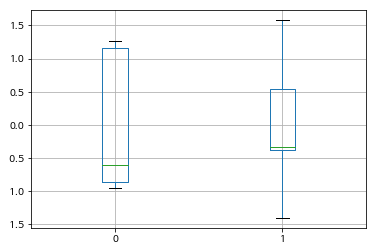

In [389]:
df1.boxplot()

In [390]:
df1.info

<bound method DataFrame.info of           0         1
0  1.271368  0.534222
1  1.161180  1.577727
2 -0.614007 -0.378025
3 -0.957928 -1.405122
4 -0.860612 -0.328803>

In [391]:
df1.shape

(5, 2)

In [392]:
df0

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
0,1,신과함께-인과 연,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
1,2,어벤져스: 인피니티 워,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
2,3,미션 임파서블: 폴아웃,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
3,4,신과함께-죄와 벌,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
4,5,쥬라기 월드: 폴른 킹덤,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
5,6,앤트맨과 와스프,2018-07-04 00:00:00,47466829685,0.03,5447981,1775,148243,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
6,7,안시성,2018-09-19 00:00:00,46317920026,0.029,5437338,1538,110387,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
7,8,블랙 팬서,2018-02-14 00:00:00,45885123957,0.029,5399227,1620,119212,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
8,9,1987,2017-12-27 00:00:00,42914036108,0.027,5289949,1122,110604,한국,한국,씨제이이앤엠(주)
9,10,독전,2018-05-22 00:00:00,43484892913,0.027,5063620,1532,140009,한국,한국,(주)넥스트엔터테인먼트월드(NEW)


In [393]:
df0=df0.set_index('영화명')
df0

,순위,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사
영화명,,,,,,,,,,
신과함께-인과 연,1,2018-08-01 00:00:00,102659887909,0.065,12274163,2235,179991,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트
어벤져스: 인피니티 워,2,2018-04-25 00:00:00,99926399769,0.063,11212710,2553,240553,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
미션 임파서블: 폴아웃,3,2018-07-25 00:00:00,55888375112,0.035,6584915,1957,101375,미국,미국,롯데컬처웍스(주)롯데엔터테인먼트
신과함께-죄와 벌,4,2017-12-20 00:00:00,47356539705,0.03,5872180,1644,121975,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
쥬라기 월드: 폴른 킹덤,5,2018-06-06 00:00:00,49770711037,0.031,5661128,1972,144779,미국,미국,유니버설픽쳐스인터내셔널 코리아(유)
앤트맨과 와스프,6,2018-07-04 00:00:00,47466829685,0.03,5447981,1775,148243,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
안시성,7,2018-09-19 00:00:00,46317920026,0.029,5437338,1538,110387,한국,한국,(주)넥스트엔터테인먼트월드(NEW)
블랙 팬서,8,2018-02-14 00:00:00,45885123957,0.029,5399227,1620,119212,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
1987,9,2017-12-27 00:00:00,42914036108,0.027,5289949,1122,110604,한국,한국,씨제이이앤엠(주)


In [394]:
df0.columns

Index(['순위', '개봉일', '매출액', '매출액 점유율', '관객수', '스크린수', '상영횟수', '대표국적', '국적',
       '배급사'],
      dtype='object')

In [395]:
max =['매출액', '매출액 점유율', '관객수', '스크린수',  '대표국적', '상영횟수']

In [396]:
df2 = df0[max]
df2 = df2[pd.notnull(df2.index)] # NaN index 지움

In [397]:
df2

,매출액,매출액 점유율,관객수,스크린수,대표국적,상영횟수
영화명,,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,한국,179991
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,미국,240553
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,미국,101375
신과함께-죄와 벌,47356539705,0.03,5872180,1644,한국,121975
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,미국,144779
앤트맨과 와스프,47466829685,0.03,5447981,1775,미국,148243
안시성,46317920026,0.029,5437338,1538,한국,110387
블랙 팬서,45885123957,0.029,5399227,1620,미국,119212
1987,42914036108,0.027,5289949,1122,한국,110604


In [398]:
df3 = pd.get_dummies(df2['대표국적'])
df3


,그리스,기타,남아프리카공화국,네덜란드,노르웨이,뉴질랜드,대만,덴마크,독일,러시아,...,페루,포르투갈,폴란드,프랑스,핀란드,필리핀,한국,헝가리,호주,홍콩
영화명,,,,,,,,,,,,,,,,,,,,,
신과함께-인과 연,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
어벤져스: 인피니티 워,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미션 임파서블: 폴아웃,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
신과함께-죄와 벌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
쥬라기 월드: 폴른 킹덤,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
앤트맨과 와스프,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
안시성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
블랙 팬서,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [399]:
df3

,그리스,기타,남아프리카공화국,네덜란드,노르웨이,뉴질랜드,대만,덴마크,독일,러시아,...,페루,포르투갈,폴란드,프랑스,핀란드,필리핀,한국,헝가리,호주,홍콩
영화명,,,,,,,,,,,,,,,,,,,,,
신과함께-인과 연,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
어벤져스: 인피니티 워,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
미션 임파서블: 폴아웃,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
신과함께-죄와 벌,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
쥬라기 월드: 폴른 킹덤,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
앤트맨과 와스프,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
안시성,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
블랙 팬서,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1987,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [400]:
df2.columns

Index(['매출액', '매출액 점유율', '관객수', '스크린수', '대표국적', '상영횟수'], dtype='object')

In [401]:
see2 = ['매출액', '매출액 점유율', '관객수', '스크린수','상영횟수']

In [402]:
df4 = df2[see2]

In [403]:
df4

,매출액,매출액 점유율,관객수,스크린수,상영횟수
영화명,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,179991
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,240553
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,101375
신과함께-죄와 벌,47356539705,0.03,5872180,1644,121975
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,144779
앤트맨과 와스프,47466829685,0.03,5447981,1775,148243
안시성,46317920026,0.029,5437338,1538,110387
블랙 팬서,45885123957,0.029,5399227,1620,119212
1987,42914036108,0.027,5289949,1122,110604


In [404]:
df4.columns
df4.head()

,매출액,매출액 점유율,관객수,스크린수,상영횟수
영화명,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,179991
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,240553
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,101375
신과함께-죄와 벌,47356539705,0.03,5872180,1644,121975
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,144779


한국 영화는 흥행정도를 총관객수로 판단함. 100만 기준으로 영화는 흥행성공/실패 판단함.
성공은 손익분기점을 넘으면 성공인데 각 영화당 제작비는 상이하므로 손익분기점이 다 다르기에 총괄적인 수치로 관객수를 영화 흥행의 지표로 사용함.

In [405]:
mybin = (0,1000000,100000000)
group_names = [0,1]
df4['흥행']=pd.cut(df4['관객수'], bins=mybin, labels = group_names)

## 영화 흥행정도를 설정해서 01 분리해주어야함.

In [406]:
df4

,매출액,매출액 점유율,관객수,스크린수,상영횟수,흥행
영화명,,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,179991,1.0
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,240553,1.0
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,101375,1.0
신과함께-죄와 벌,47356539705,0.03,5872180,1644,121975,1.0
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,144779,1.0
앤트맨과 와스프,47466829685,0.03,5447981,1775,148243,1.0
안시성,46317920026,0.029,5437338,1538,110387,1.0
블랙 팬서,45885123957,0.029,5399227,1620,119212,1.0
1987,42914036108,0.027,5289949,1122,110604,1.0


In [407]:
##Nan 데이터 처리
df4 = df4[pd.notnull(df4['흥행'])] # NaN index 지움

In [408]:
df4

,매출액,매출액 점유율,관객수,스크린수,상영횟수,흥행
영화명,,,,,,
신과함께-인과 연,102659887909,0.065,12274163,2235,179991,1
어벤져스: 인피니티 워,99926399769,0.063,11212710,2553,240553,1
미션 임파서블: 폴아웃,55888375112,0.035,6584915,1957,101375,1
신과함께-죄와 벌,47356539705,0.03,5872180,1644,121975,1
쥬라기 월드: 폴른 킹덤,49770711037,0.031,5661128,1972,144779,1
앤트맨과 와스프,47466829685,0.03,5447981,1775,148243,1
안시성,46317920026,0.029,5437338,1538,110387,1
블랙 팬서,45885123957,0.029,5399227,1620,119212,1
1987,42914036108,0.027,5289949,1122,110604,1


In [409]:
X_new = df4.drop(['흥행','관객수'],axis=1)
y = df4['흥행']

In [410]:
X_new.shape


(34097, 4)

In [411]:
y.shape

(34097,)

In [412]:
y.value_counts()

0    33423
1      674
Name: 흥행, dtype: int64

In [413]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X_new)

/home/mll/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mll/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [414]:
X[:5]

array([[25.99772181, 22.28291984, 16.71976182, 17.58016495],
       [25.30171343, 21.59271238, 19.13720661, 23.55921498],
       [14.08862866, 11.92980793, 14.60639814,  9.81871391],
       [11.91622892, 10.20428928, 12.2269635 , 11.85247156],
       [12.53093196, 10.54939301, 14.72042856, 14.10382153]])

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [416]:
X_train.shape, y_train.shape

((27277, 4), (27277,))

In [417]:
X_test.shape, y_test.shape

((6820, 4), (6820,))

In [418]:
y_test

영화명
덫: 선동 혹은 사주                    0
2014 siaff 단편경선5               0
박서방                            0
지상 최대의 작전                      0
비터 머니                          0
흡혈형사 나도열                       1
스와핑 : 친구의 아내 2                 0
사랑할 때와 죽을 때                    0
동갑내기 엄마                        0
SIFF2016-특별단편 6                0
엄마의 레시피                        0
에츠코의 음란한 비밀                    0
세븐데이즈                          0
다크 스트레인저                       0
미스 사이공 : 25주년 특별 공연            0
거미의 성                          0
파친코의 여왕                        0
지금, 이대로가 좋아요                   0
초원의 빛                          0
매니저                            0
터치                             0
친구엄마: 은밀한 유혹 무삭제판              0
헨젤과 그레텔                        0
너도 숟가락 살인마가 될 수 있다             0
니코: 마법 세계로의 여행                 0
잘 왔다. 우리 같이 살자                 0
왕중왕                            0
솔로이스트                          0
글로리아                           0
아메리칸 배틀쉽                       0
      

In [419]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

/home/mll/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9976539589442815

In [420]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.999266862170088

In [421]:
y_score = sgd.decision_function(X_test)

In [422]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)
# RandomForest에 대한 confusion_matrix

array([[6691,    3],
       [  13,  113]])

In [423]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

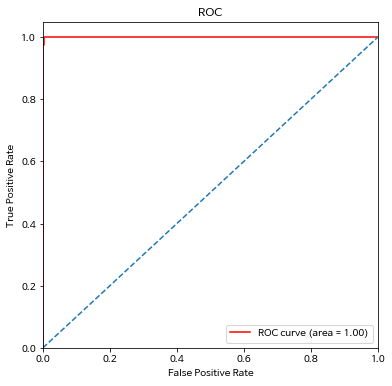

In [424]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

In [425]:
movie = pd.read_excel('data/영화정보 삭제1.xlsx', encoding='CP949')

In [426]:
movie = movie.fillna(0)

In [427]:
movie

,영화명,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
0,명량,136000000000,17613682,한국,씨제이이앤엠(주),한국,김한민,사극,액션,0,0,0,0,0
1,베테랑,105000000000,13414009,한국,씨제이이앤엠(주),한국,류승완,액션,드라마,0,0,0,0,0
2,도둑들,93664808500,12983178,한국,(주)쇼박스,"한국,홍콩",최동훈,액션,범죄,0,0,0,0,0
3,7번방의 선물,91431914670,12811206,한국,(주)넥스트엔터테인먼트월드(NEW),한국,이환경,코미디,드라마,0,0,0,0,0
4,암살,98463132781,12705700,한국,(주)쇼박스,한국,최동훈,액션,드라마,0,0,0,0,0
5,"광해, 왕이 된 남자",88899448769,12319390,한국,씨제이이앤엠(주),한국,추창민,사극,드라마,0,0,0,0,0
6,신과함께-인과 연,103000000000,12274163,한국,롯데컬처웍스(주)롯데엔터테인먼트,한국,김용화,판타지,드라마,0,0,0,0,0
7,택시운전사,95853645649,12186327,한국,(주)쇼박스,한국,장훈,드라마,0,0,0,0,0,0
8,부산행,93178283048,11565479,한국,(주)넥스트엔터테인먼트월드(NEW),한국,연상호,액션,스릴러,0,0,0,0,0
9,해운대,81025004000,11324433,한국,씨제이엔터테인먼트,한국,윤제균,액션,드라마,어드벤처,0,0,0,0


제작국가, 장르 1 빼고 다 날리자

In [428]:
movie = movie.set_index('영화명')
movie


,매출액,관객수,대표국적,배급사,제작국가,감독,장르1,장르2,장르3,장르4,장르5,장르6,장르7
영화명,,,,,,,,,,,,,
명량,136000000000,17613682,한국,씨제이이앤엠(주),한국,김한민,사극,액션,0,0,0,0,0
베테랑,105000000000,13414009,한국,씨제이이앤엠(주),한국,류승완,액션,드라마,0,0,0,0,0
도둑들,93664808500,12983178,한국,(주)쇼박스,"한국,홍콩",최동훈,액션,범죄,0,0,0,0,0
7번방의 선물,91431914670,12811206,한국,(주)넥스트엔터테인먼트월드(NEW),한국,이환경,코미디,드라마,0,0,0,0,0
암살,98463132781,12705700,한국,(주)쇼박스,한국,최동훈,액션,드라마,0,0,0,0,0
"광해, 왕이 된 남자",88899448769,12319390,한국,씨제이이앤엠(주),한국,추창민,사극,드라마,0,0,0,0,0
신과함께-인과 연,103000000000,12274163,한국,롯데컬처웍스(주)롯데엔터테인먼트,한국,김용화,판타지,드라마,0,0,0,0,0
택시운전사,95853645649,12186327,한국,(주)쇼박스,한국,장훈,드라마,0,0,0,0,0,0
부산행,93178283048,11565479,한국,(주)넥스트엔터테인먼트월드(NEW),한국,연상호,액션,스릴러,0,0,0,0,0


In [429]:
movie.columns

Index(['매출액', '관객수', '대표국적', '배급사', '제작국가', '감독', '장르1', '장르2', '장르3', '장르4',
       '장르5', '장르6', '장르7'],
      dtype='object')

In [430]:
list=['매출액', '관객수', '대표국적', '장르1']

In [431]:
movie2 =movie[list]

In [432]:
movie2

,매출액,관객수,대표국적,장르1
영화명,,,,
명량,136000000000,17613682,한국,사극
베테랑,105000000000,13414009,한국,액션
도둑들,93664808500,12983178,한국,액션
7번방의 선물,91431914670,12811206,한국,코미디
암살,98463132781,12705700,한국,액션
"광해, 왕이 된 남자",88899448769,12319390,한국,사극
신과함께-인과 연,103000000000,12274163,한국,판타지
택시운전사,95853645649,12186327,한국,드라마
부산행,93178283048,11565479,한국,액션


In [433]:
movie2

,매출액,관객수,대표국적,장르1
영화명,,,,
명량,136000000000,17613682,한국,사극
베테랑,105000000000,13414009,한국,액션
도둑들,93664808500,12983178,한국,액션
7번방의 선물,91431914670,12811206,한국,코미디
암살,98463132781,12705700,한국,액션
"광해, 왕이 된 남자",88899448769,12319390,한국,사극
신과함께-인과 연,103000000000,12274163,한국,판타지
택시운전사,95853645649,12186327,한국,드라마
부산행,93178283048,11565479,한국,액션


In [434]:
nation=pd.get_dummies(movie2['대표국적'])

In [435]:
genre=pd.get_dummies(movie2['장르1'])

In [436]:
movie2 = pd.concat([movie2,nation], axis=1)
movie2 = pd.concat([movie2,genre], axis=1)

In [477]:
movie2

,그리스,기타,기타,기타,기타,기타,기타,기타,기타,기타,...,사극,서부극(웨스턴),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,흥행
영화명,,,,,,,,,,,,,,,,,,,,,
명량,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
베테랑,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
도둑들,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7번방의 선물,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
암살,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
"광해, 왕이 된 남자",0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
신과함께-인과 연,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
택시운전사,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
부산행,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


감독, 국적 장르에 따라 점수화 ->cut 써서 카테고리화해서 수치데이터로 변경하자.

In [438]:
mybin = (0,1000000,20000000)
group_names = [0,1]
movie2['흥행']=pd.cut(movie2['관객수'], bins=mybin, labels = group_names)

In [439]:
movie2

,매출액,관객수,대표국적,장르1,그리스,기타,남아프리카공화국,네덜란드,노르웨이,뉴질랜드,...,사극,서부극(웨스턴),스릴러,애니메이션,액션,어드벤처,전쟁,코미디,판타지,흥행
영화명,,,,,,,,,,,,,,,,,,,,,
명량,136000000000,17613682,한국,사극,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
베테랑,105000000000,13414009,한국,액션,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
도둑들,93664808500,12983178,한국,액션,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7번방의 선물,91431914670,12811206,한국,코미디,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
암살,98463132781,12705700,한국,액션,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
"광해, 왕이 된 남자",88899448769,12319390,한국,사극,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
신과함께-인과 연,103000000000,12274163,한국,판타지,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
택시운전사,95853645649,12186327,한국,드라마,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
부산행,93178283048,11565479,한국,액션,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [440]:
movie2.columns

Index(['매출액', '관객수', '대표국적', '장르1', '그리스', '기타', '남아프리카공화국', '네덜란드', '노르웨이',
       '뉴질랜드', '대만', '덴마크', '독일', '러시아', '루마니아', '말레이시아', '멕시코', '미국', '베트남',
       '벨기에', '보스니아', '브라질', '스웨덴', '스위스', '스페인', '싱가포르', '아르헨티나', '아이슬란드',
       '아일랜드', '영국', '오스트리아', '우루과이', '우크라이나', '이란', '이스라엘', '이탈리아', '인도',
       '인도네시아', '일본', '중국', '체코', '칠레', '캐나다', '태국', '터키', '팔레스타인', '페루',
       '포르투갈', '폴란드', '프랑스', '핀란드', '한국', '헝가리', '호주', '홍콩', 'SF', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '흥행'],
      dtype='object')

In [457]:
see=['그리스', '기타', '남아프리카공화국', '네덜란드', '노르웨이',
       '뉴질랜드', '대만', '덴마크', '독일', '러시아', '루마니아', '말레이시아', '멕시코', '미국', '베트남',
       '벨기에', '보스니아', '브라질', '스웨덴', '스위스', '스페인', '싱가포르', '아르헨티나', '아이슬란드',
       '아일랜드', '영국', '오스트리아', '우루과이', '우크라이나', '이란', '이스라엘', '이탈리아', '인도',
       '인도네시아', '일본', '중국', '체코', '칠레', '캐나다', '태국', '터키', '팔레스타인', '페루',
       '포르투갈', '폴란드', '프랑스', '핀란드', '한국', '헝가리', '호주', '홍콩', 'SF', '가족', '공연',
       '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로/로맨스', '뮤지컬', '미스터리', '범죄', '사극',
       '서부극(웨스턴)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지', '흥행']

In [476]:
movie2=movie2[see]

In [459]:
X_new = movie2.drop(['흥행'], axis=1)
y=movie2['흥행']

In [460]:
X_new.shape

(4540, 85)

In [461]:
y.shape

(4540,)

In [462]:
sc = preprocessing.StandardScaler()
X = sc.fit_transform(X_new)

/home/mll/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/mll/.local/lib/python3.5/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [463]:
X[:5]

array([[-0.01484294, -0.01484294, -0.02969569, -0.01484294, -0.02969569,
        -0.01484294, -0.02969569, -0.01484294, -0.02969569, -0.0209934 ,
        -0.03637767, -0.04928278, -0.01484294, -0.06482754, -0.06816924,
        -0.13392991, -0.07135738, -0.0209934 , -0.02571439, -0.0469841 ,
        -0.74341615, -0.01484294, -0.0594701 , -0.01484294, -0.0209934 ,
        -0.04928278, -0.0209934 , -0.11766676, -0.01484294, -0.03637767,
        -0.03637767, -0.05358786, -0.22994716, -0.03320446, -0.01484294,
        -0.01484294, -0.03320446, -0.04456811, -0.08940299, -0.06482754,
        -0.0209934 , -0.31928318, -0.15461623, -0.03320446, -0.02969569,
        -0.10117248, -0.0556169 , -0.02571439, -0.01484294, -0.02571439,
        -0.01484294, -0.0209934 , -0.2403787 , -0.04201458,  1.51165276,
        -0.02571439, -0.06978117, -0.10445435, -0.15386783, -0.1000556 ,
        -0.08017936, -0.21857014, -0.01484294, -0.02969569, -0.01484294,
        -0.02969569, -0.01484294, -0.02969569, -0.0

In [464]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.score(X_test,y_test)

/home/mll/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9982404692082112

In [465]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test,y_test)

0.9991202346041056

In [466]:
rfc = RandomForestClassifier(n_estimators=300) 
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

0.9995601173020527

In [467]:
# estimator = 모델, cv는 분할 테스트 숫자
rfc_eval = cross_val_score(rfc, X = X, y = y, cv = 5)  
rfc_eval  # 5번의 교차 검증 결과를 보여준다

array([0.85588559, 0.86013216, 0.85792952, 0.85903084, 0.86438809])

In [468]:
rfc_eval.mean()

0.8594732384370163

In [469]:
y_pred = sgd.predict(X_test)
confusion_matrix(y_test, y_pred)
# RandomForest에 대한 confusion_matrix

array([[6689,    5],
       [   7,  119]])

In [470]:
# 여러 성능 지표를 출력한다
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6694
           1       0.96      0.94      0.95       126

   micro avg       1.00      1.00      1.00      6820
   macro avg       0.98      0.97      0.98      6820
weighted avg       1.00      1.00      1.00      6820



In [471]:
y_score = sgd.decision_function(X_test)

In [473]:
result = pd.DataFrame(y_pred, columns=['predict'])
result['real'] = y_test.values
result['correct'] = (result.predict == result.real)
result['score'] = y_score
result

,predict,real,correct,score
0,0,0,True,-81.704088
1,0,0,True,-81.704082
2,0,0,True,-81.681251
3,0,0,True,-81.679656
4,0,0,True,-81.703172
5,1,1,True,25.746698
6,0,0,True,-81.444568
7,0,0,True,-81.683590
8,0,0,True,-81.457657
9,0,0,True,-81.702316


In [474]:
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

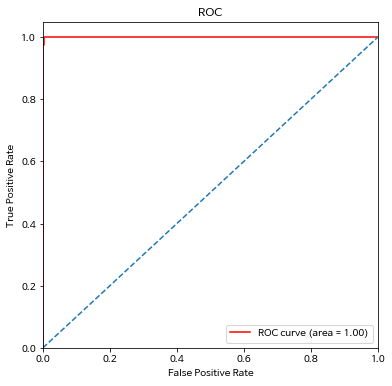

In [475]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")